In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:



df = pd.read_csv('gvc_output_WITS.csv')

# Filter data for sector codes of interest
sectors_of_interest = [1, 2, 6, 10]
filtered_df = df[df['sect'].isin(sectors_of_interest)]

# Sort data by year for each country
sorted_df = filtered_df.sort_values(['country', 'sect', 't'], ascending=[True, True, True])

# Save the filtered and sorted data to a new .csv file
output_file_path = 'GVC_data\GVC_cleaned.csv'
sorted_df.to_csv(output_file_path, index=False)


In [17]:
columns_to_diff = ['outp', 'outpd', 'outptt', 'gvco', 'gvcobp', 'gvcofp', 'gvcomix']

# Read the combined file containing data for all the sectors
file_path = 'GVC_data\GVC_cleaned.csv'
combined_df = pd.read_csv(file_path)

# Group by country and sector, and calculate year-on-year differences
combined_diff = combined_df.groupby(['country', 'sect'])[columns_to_diff].diff()

# Add the year-on-year differences as new columns in the original combined DataFrame
for column in columns_to_diff:
    combined_df[f'{column}_diff'] = combined_diff[column]

# Save the combined DataFrame with year-on-year differences to a .csv file
output_file_path = 'GVC_data\GVC_year_on_year_differences.csv'
combined_df.to_csv(output_file_path, index=False)

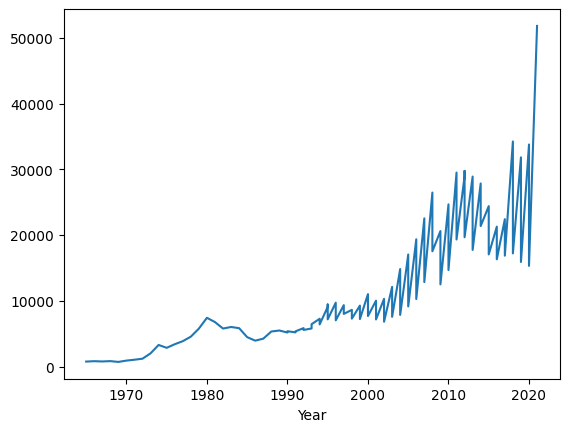

In [18]:
usa = combined_df[combined_df['country'] == 'USA']
usa_0 = usa[usa['sect'] == 1]

# create plot
plt.plot(usa_0['t'], usa_0['gvcomix'])
plt.xlabel('Year')
plt.ylabel('')
plt.show()

#based on graph shapes we need to tranform the variables these ways. 

#outp: log 
#outpd: log
#outptt: log

#I will assume gvc data i already proportion? But the values seem too high
#gvco: log
#gvcbp: log
#gvcofp: log
#gvcomix: log

In [19]:
# Columns for which to calculate logarithm and then year-on-year differences
log_columns = ['outp', 'outpd', 'outptt']

# Read the combined file containing data for all the sectors
file_path = 'GVC_data\GVC_cleaned.csv'
combined_df = pd.read_csv(file_path)

# Calculate the logarithm of the specified columns
combined_df[log_columns] = np.log(combined_df[log_columns])

# Group by country and sector, and calculate year-on-year differences
combined_diff = combined_df.groupby(['country', 'sect'])[columns_to_diff].diff()

# Add the year-on-year differences as new columns in the original combined DataFrame
for column in columns_to_diff:
    combined_df[f'{column}_diff'] = combined_diff[column]

# Save the combined DataFrame with year-on-year differences to a .csv file
output_file_path = 'GVC_data\GVC_year_on_year_log_differences.csv'
combined_df.to_csv(output_file_path, index=False)

C:\Users\yezon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\yezon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
